# Introducción a Tensor Flow

**Trateremos de identificar que tipo de señal de transito es cada imagen, con un set de prueba y otro de entrenamiento otorgado por un dataset de señales de transito de belgica**

## Deep Learning y aprendizaje no supervisado

In [7]:
import tensorflow as tf
import os

In [8]:
print(tensorflow.__version__)

1.14.0


In [9]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [10]:
res = tf.multiply(x1,x2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [12]:
###para tf v1 
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [15]:
config = tf.ConfigProto(log_device_placement= True)
config = tf.ConfigProto(allow_soft_placement= True)

# Aprendizaje neuronal de las señales de tráfico

In [16]:
import imageio as imd

In [17]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory) 
           if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir,f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
    return images, labels

In [18]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [19]:
images, labels= load_ml_data(train_data_dir)

In [20]:
len(images)

4575

**Hemos cargado 4575 imagenes**

In [21]:
type(images)

list

**Convertiremos imagenesy labels a array**

In [22]:
import numpy as np

In [23]:
images = np.array(images)
labels = np.array(labels)

In [24]:
images.size

4575

In [25]:
## veamos la primera imagen
images[0]

Array([[[ 97,  66,  53],
        [ 98,  67,  53],
        [ 99,  67,  53],
        ...,
        [ 64,  69,  94],
        [ 66,  63,  75],
        [ 67,  57,  57]],

       [[ 96,  65,  51],
        [ 97,  65,  52],
        [ 98,  65,  52],
        ...,
        [ 66,  69,  89],
        [ 67,  62,  71],
        [ 68,  57,  55]],

       [[ 95,  63,  50],
        [ 96,  63,  50],
        [ 96,  64,  50],
        ...,
        [ 68,  68,  81],
        [ 67,  61,  66],
        [ 69,  57,  53]],

       ...,

       [[220, 221, 208],
        [222, 223, 212],
        [223, 224, 215],
        ...,
        [ 55,  42,  34],
        [ 58,  40,  30],
        [ 77,  60,  47]],

       [[219, 219, 205],
        [221, 221, 209],
        [222, 222, 212],
        ...,
        [ 53,  50,  39],
        [ 51,  39,  28],
        [ 77,  62,  50]],

       [[216, 214, 201],
        [218, 218, 206],
        [220, 220, 209],
        ...,
        [ 49,  49,  38],
        [ 47,  38,  28],
        [ 76,  63,  51]]

In [26]:
print("largo de la imagen %s"%len(images[0])+ "\n ancho de la imagen %s"%len(images[0][0]))

largo de la imagen 132
 ancho de la imagen 115


**Aquí están los 132x115 pixeles que tiene la imagen, cada pixel esta compuesto por un array de 3 colores, RGB.**

In [27]:
labels

array([42, 42, 42, ...,  7,  7,  7])

In [28]:
labels[0]

42

In [29]:
labels.ndim

1

In [30]:
labels.size

4575

In [31]:
print(" imagenes de diferente tipo: %s"%len(set(labels)))

 imagenes de diferente tipo: 62


In [32]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [33]:
images.itemsize

8

In [34]:
images.nbytes

36600

In [35]:
print("los KBytes que estoy ocupando en memoria hasta el momento son: %s"%((images.nbytes/images.itemsize)/1024))

los KBytes que estoy ocupando en memoria hasta el momento son: 4.4677734375


In [36]:
import matplotlib.pyplot as plt

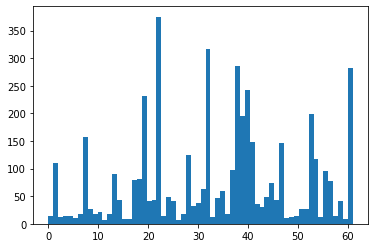

In [37]:
## veamos las distribuciones de las diferentes imagenes
plt.hist(labels, len(set(labels)))
plt.show()

In [38]:
import random 

In [39]:
## veamos algunas imagenes al azar, 6 en particular
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[2840, 1061, 2989, 3330, 1802, 2095]

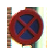

Forma:(76, 73, 3), min:0, max:255


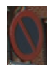

Forma:(92, 62, 3), min:14, max:160


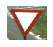

Forma:(84, 99, 3), min:12, max:255


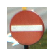

Forma:(105, 99, 3), min:12, max:255


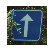

Forma:(184, 188, 3), min:0, max:255


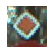

Forma:(37, 36, 3), min:8, max:255


In [40]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

**Vemos que hay imagenes de distintos tamaños, no todas son iguales.**
* Aquí en Forma indicamos: largo, ancho, canales rgb
* Min: minimo valor de BLANCO  (entre más bajo es más negro)
* Max: maximo valor de BLANCO

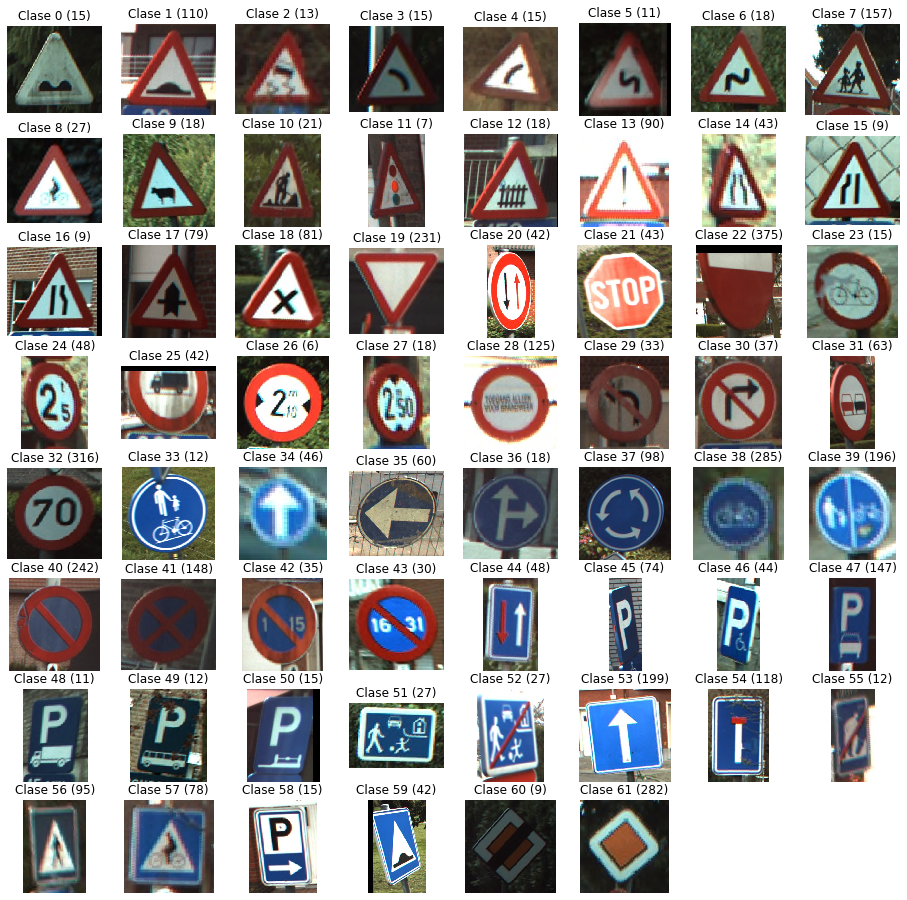

In [41]:
##ploteamos todas las imagenes diferentes que tendremos y la clase a la cual pertenecen(id) y su cantidad
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i=1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)
plt.show()

# Modelo de Red Neuronal con TensorFlow

* Las imagenes no son todas del mismo tamaño
* Hay 62 clases de imágenes (desde 0 hasta 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

## Preprocesado
* Debemos trabajar en escala de grises y no RGB, de modo de que le color no nos importe (hay fotos muy oscuras)
* Debemos reescalar el tamaño de las imagenes para que todas tengan el mismo tamaño

In [42]:
from skimage import transform

In [43]:
#veamos el mínimo tamaño que hay en las imagenes

w = 9999
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño minimo: {0}x{1}".format(h,w))

Tamaño minimo: 22x20


In [44]:
## lo haremos con 30x30
images30 = [transform.resize(image, (30,30)) for image in images]

In [45]:
images30[0]

array([[[0.37647059, 0.24754902, 0.19656863],
        [0.36343137, 0.24401961, 0.19509804],
        [0.35611111, 0.24738562, 0.19640523],
        ...,
        [0.2622549 , 0.26578431, 0.36196078],
        [0.2427451 , 0.26676471, 0.38      ],
        [0.2504902 , 0.23928105, 0.27941176]],

       [[0.38470588, 0.24745098, 0.2001634 ],
        [0.39      , 0.26029412, 0.20529412],
        [0.39300654, 0.26392157, 0.20045752],
        ...,
        [0.385     , 0.32343137, 0.29480392],
        [0.36137255, 0.285     , 0.26735294],
        [0.25944444, 0.19186275, 0.16679739]],

       [[0.40081699, 0.26356209, 0.2       ],
        [0.41519608, 0.27990196, 0.21078431],
        [0.43104575, 0.3001634 , 0.22745098],
        ...,
        [0.39771242, 0.26633987, 0.20212418],
        [0.41078431, 0.26862745, 0.20392157],
        [0.30964052, 0.21405229, 0.16928105]],

       ...,

       [[0.88169935, 0.89232026, 0.84918301],
        [0.90294118, 0.92156863, 0.87352941],
        [0.91584967, 0

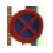

Forma:(30, 30, 3), min:0.06004357298474821, max:0.996078431372549


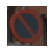

Forma:(30, 30, 3), min:0.059084967320261535, max:0.4812287581699339


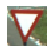

Forma:(30, 30, 3), min:0.11794117647058842, max:0.996078431372549


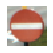

Forma:(30, 30, 3), min:0.07210784313725485, max:0.9949509803921569


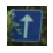

Forma:(30, 30, 3), min:0.06401307189542473, max:0.6862745098039216


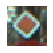

Forma:(30, 30, 3), min:0.07896078431372539, max:1.0


In [46]:
rand_sings= random.sample(range(0,len(labels)),6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

**Hemos reescalado las imagenes a 30x30 y además normalizamos los valores de blanco de 0 a 1 esto es muy util, ya que lo ibamos a necesitar de todas formas**

## Transformando a escala de grises

In [47]:
from skimage.color import rgb2gray

In [48]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

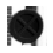

Forma:(30, 30), min:0.1059442647058822, max:0.996078431372549


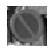

Forma:(30, 30), min:0.07939874248366005, max:0.4650729856209144


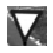

Forma:(30, 30), min:0.17202270588235344, max:0.9954206862745099


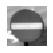

Forma:(30, 30), min:0.09162617156862746, max:0.994155774509804


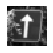

Forma:(30, 30), min:0.08155847973856208, max:0.6538309041394336


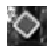

Forma:(30, 30), min:0.12672180784313733, max:0.9686969006535942


In [49]:
rand_sings= random.sample(range(0,len(labels)),6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

**Vemos como hemos cambiado a escala de grices**

## Red Neuronal

In [52]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

#capa de entrada
images_flat = tf.contrib.layers.flatten(x)

# nuestra capa de conexion, en donde clasificara las 62 imagenes aplanadas de entrada
logits = tf.contrib.layers.fully_connected(images_flat, 62 , tf.nn.relu)

#funcion de perdida
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels= y, logits = logits))
## mide la prob de error en untre las variables que entregue


## definimos un optimizador con una tasa de aprendizaje de 0.001 minimizando la funcion de perdida
train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


## prediccion final

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [53]:
images_flat

<tf.Tensor 'Flatten_2/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [54]:
logits

<tf.Tensor 'fully_connected_2/Relu:0' shape=(?, 62) dtype=float32>

In [55]:
loss

<tf.Tensor 'Mean_4:0' shape=() dtype=float32>

In [56]:
final_pred

<tf.Tensor 'ArgMax_2:0' shape=(?,) dtype=int64>

**Hemos construido la Red Neuronal, pero aún no la hemos ejecutado, es el paso siguiente**

In [61]:
## es importante definir la semilla antes de iniciar la sesion, de ese modo siempre tendremos el mismo resultado
tf.set_random_seed(1234)

## creamos un entorno de trabajo
sess = tf.Session()

# corremos las variables globales
sess.run(tf.global_variables_initializer())

for i in range(1000): ## 300 son pocas
    ## aqui corremos la red, entregando el optimizador y entrenado por la medida de accuracy, podría ser
    ## perfectamente la perdida
    _, accuracy_val = sess.run([train_opt, accuracy], 
                              feed_dict = {
                                  x: images30,
                                  y: list(labels)
                              })
    ## entrenamos con el valor de perdida
    _, loss_val = sess.run([train_opt, loss], 
                              feed_dict = {
                                  x: images30,
                                  y: list(labels)
                              })
    if i%100 == 0:
        print("Epoch: ", i)
        print("Eficacia: ", accuracy_val)
        print("Perdida: ",loss_val)
    #print("Fin del Epoch:", i)

Epoch:  0
Eficacia:  35.46776
Perdida:  4.087681
Epoch:  100
Eficacia:  34.996067
Perdida:  1.9345107
Epoch:  200
Eficacia:  34.993004
Perdida:  1.6731513
Epoch:  300
Eficacia:  34.684155
Perdida:  1.5498368
Epoch:  400
Eficacia:  34.47388
Perdida:  1.4748029
Epoch:  500
Eficacia:  34.220764
Perdida:  1.4232194
Epoch:  600
Eficacia:  34.082188
Perdida:  1.3846852
Epoch:  700
Eficacia:  33.75038
Perdida:  1.354138
Epoch:  800
Eficacia:  33.41202
Perdida:  1.3291235
Epoch:  900
Eficacia:  33.152786
Perdida:  1.3081082


## Validación del modelo
### Evaluacion de la red neuronal

In [73]:
sample_idx = random.sample(range(len(images30)),40) ##tomaremos 40 imagenes para ver como anda
sample_images = [images30[i] for i in sample_idx]
sample_labels =[labels[i] for i in sample_idx]

In [74]:
sample_labels

[55,
 32,
 47,
 38,
 32,
 39,
 18,
 32,
 1,
 1,
 32,
 22,
 41,
 40,
 51,
 40,
 28,
 47,
 37,
 39,
 22,
 58,
 22,
 32,
 32,
 39,
 39,
 21,
 41,
 18,
 40,
 24,
 28,
 47,
 47,
 27,
 22,
 53,
 23,
 44]

In [75]:
## ojo que la sesion está abierta aun
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]
prediction

array([ 7, 32, 28, 38, 32,  0, 18, 32, 28,  7, 32, 22, 41, 40, 41, 40, 28,
        0, 37, 39, 22, 61, 22, 32, 32, 39, 39, 21, 41, 18, 40, 40, 28,  7,
       28, 19, 22, 53, 32, 61])

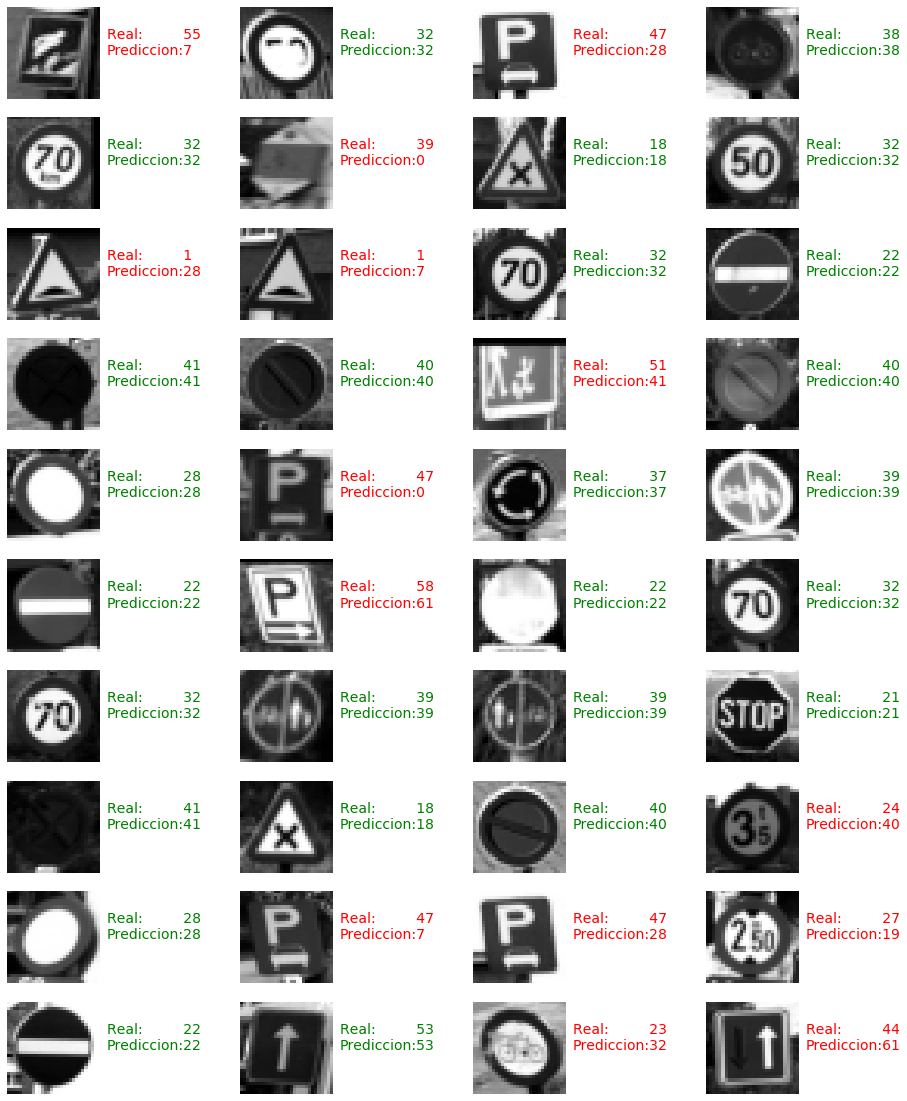

In [76]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    pred = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth == pred else "red"
    plt.text(32,15,"Real:         {0}\nPrediccion:{1}".format(truth,pred), fontsize = 14, color = color)
    plt.imshow(sample_images[i],cmap="gray")

plt.show()    

**Vemos que hay varias que la red no alcanza a distinguir y se equivoca, sin embargo no podemos ver el dataset completo, para ello utilizaremos la funcion load_md que habiamos preparado**

## Validamos con el set de Testeo

In [77]:
test_images, test_labels = load_ml_data(test_data_dir)

In [78]:
## aplanamos
test_images30 = [transform.resize(im,(30,30)) for im in test_images]
len(test_images30)

2520

In [79]:
## pasamos a escala de grises
test_images30 = rgb2gray(np.array(test_images30))

In [80]:
precdictions  = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [82]:
match_count = sum([int(lo==lp) for lo, lp in zip(test_labels,precdictions)])
match_count

1862

In [83]:
### vemos la precisión
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 73.89


**Tenemos una eficacia de 73%. Se puede mejorar cambiando el learning_Rate, el modo de minimizar, etc**